In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("flipkart_reviews.csv")
print(data.head())

                                        Product_name  \
0  BoAt Rockerz 235v2 with ASAP charging Version ...   
1  BoAt Rockerz 235v2 with ASAP charging Version ...   
2  BoAt Rockerz 235v2 with ASAP charging Version ...   
3  BoAt Rockerz 235v2 with ASAP charging Version ...   
4  BoAt Rockerz 235v2 with ASAP charging Version ...   

                                              Review  Rating  
0  1-more flexible2-bass is very high3-sound clar...       5  
1     Super sound and good looking I like that prize       5  
2  Very much satisfied with the device at this pr...       5  
3  Nice headphone, bass was very good and sound i...       5  
4  Sound quality super battery backup super quali...       5  


In [81]:
data.isnull().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

In [82]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

In [83]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

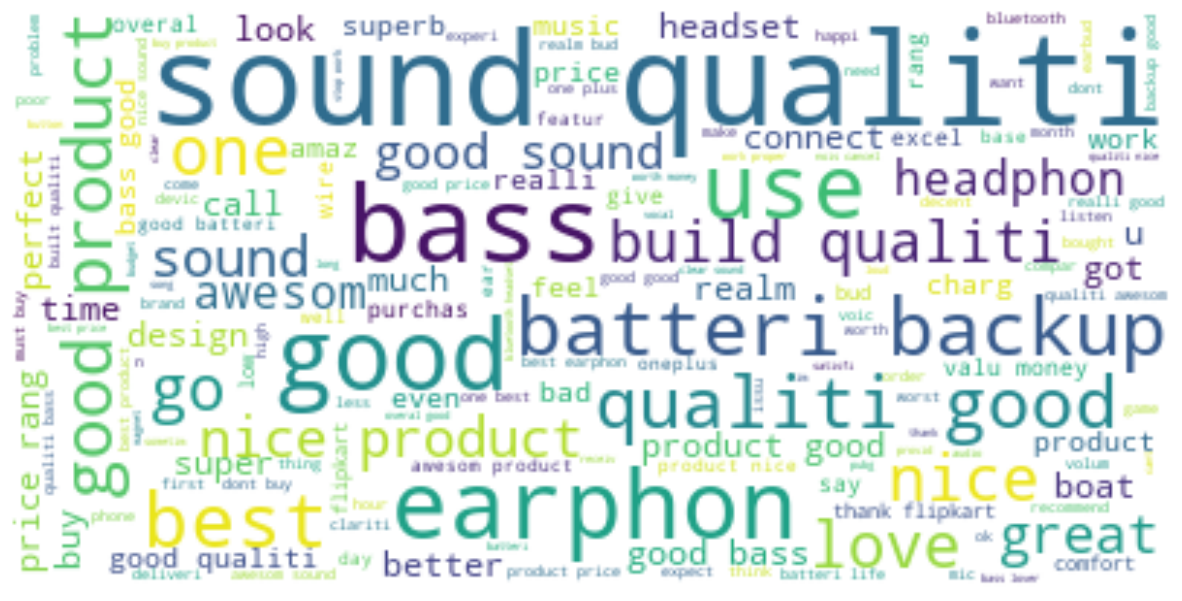

In [84]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [85]:
#nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

                                              Review  Positive  Negative  \
0     clariti good  back   hour  thing fastest ch...     0.287     0.063   
1                   super sound good look like prize     0.863     0.000   
2  much satisfi devic price point awesom brand de...     0.223     0.071   
3  nice headphon bass good sound clear purchas ca...     0.394     0.057   
4  sound qualiti super batteri backup super quali...     0.634     0.000   

   Neutral  
0    0.650  
1    0.137  
2    0.707  
3    0.548  
4    0.366  


In [86]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [87]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  3778.6910000000776
Negative:  517.9149999999994
Neutral:  5075.403999999948
